In [24]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10, mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, classification_report

In [25]:
# Load MNIST dataset
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()
class_names_mnist = [str(i) for i in range(10)]

# Preprocess MNIST data
x_train_mnist = np.expand_dims(x_train_mnist.astype('float32') / 255.0, -1)
x_test_mnist = np.expand_dims(x_test_mnist.astype('float32') / 255.0, -1)
y_train_mnist = to_categorical(y_train_mnist, 10)
y_test_mnist = to_categorical(y_test_mnist, 10)

In [26]:
# Load CIFAR-10 dataset
(x_train_cifar10, y_train_cifar10), (x_test_cifar10, y_test_cifar10) = cifar10.load_data()
class_names_cifar10 = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Preprocess CIFAR-10 data
x_train_cifar10 = x_train_cifar10.astype('float32') / 255.0
x_test_cifar10 = x_test_cifar10.astype('float32') / 255.0
y_train_cifar10 = to_categorical(y_train_cifar10, 10)
y_test_cifar10 = to_categorical(y_test_cifar10, 10)

In [27]:
# Data augmentation for CIFAR-10
datagen_cifar10 = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen_cifar10.fit(x_train_cifar10)

In [28]:
# Define ResNet50 model for MNIST
def create_resnet50_mnist(input_shape, num_classes):
    base_model = tf.keras.applications.ResNet50(weights=None, include_top=False, input_shape=input_shape)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [29]:
# Define ResNet50 model for CIFAR-10
def create_resnet50_cifar10(input_shape, num_classes):
    base_model = tf.keras.applications.ResNet50(weights=None, include_top=False, input_shape=input_shape)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [33]:
from skimage.transform import resize

# Resize MNIST images to 32x32 pixels
x_train_mnist_resized = np.array([resize(image, (32, 32)) for image in x_train_mnist])
x_test_mnist_resized = np.array([resize(image, (32, 32)) for image in x_test_mnist])

# Train and evaluate ResNet50 on resized MNIST
resnet50_mnist = create_resnet50_mnist(x_train_mnist_resized.shape[1:], 10)
history_mnist_resnet50 = resnet50_mnist.fit(x_train_mnist_resized, y_train_mnist, epochs=10, validation_data=(x_test_mnist_resized, y_test_mnist))

Epoch 1/10
   3/1875 ━━━━━━━━━━━━━━━━━━━━ 1:26 46ms/step - accuracy: 0.1111 - loss: 6.6373   

W0000 00:00:1717844328.964359     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8154 - loss: 0.8753

W0000 00:00:1717844387.477654     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 124s 34ms/step - accuracy: 0.8155 - loss: 0.8750 - val_accuracy: 0.9468 - val_loss: 0.1875
Epoch 2/10
   3/1875 ━━━━━━━━━━━━━━━━━━━━ 1:21 43ms/step - accuracy: 0.9045 - loss: 0.2637

W0000 00:00:1717844391.943156     103 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9581 - loss: 0.1902 - val_accuracy: 0.9438 - val_loss: 0.3049
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9528 - loss: 0.2091 - val_accuracy: 0.9785 - val_loss: 0.0901
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9731 - loss: 0.1332 - val_accuracy: 0.9845 - val_loss: 0.0663
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9553 - loss: 0.1852 - val_accuracy: 0.9675 - val_loss: 0.1242
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9612 - loss: 0.1740 - val_accuracy: 0.9269 - val_loss: 0.2421
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9497 - loss: 0.2006 - val_accuracy: 0.9844 - val_loss: 0.0632
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9793 - loss: 0.0850 - val_accuracy: 0.9821 - val_loss: 0.0659
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9645 - loss: 0.16

In [32]:
# Train and evaluate ResNet50 on CIFAR-10
resnet50_cifar10 = create_resnet50_cifar10(x_train_cifar10.shape[1:], 10)
history_cifar10_resnet50 = resnet50_cifar10.fit(datagen_cifar10.flow(x_train_cifar10, y_train_cifar10, batch_size=64),
                                                epochs=10,
                                                validation_data=(x_test_cifar10, y_test_cifar10),
                                                steps_per_epoch=x_train_cifar10.shape[0] // 64)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  3/781 ━━━━━━━━━━━━━━━━━━━━ 43s 56ms/step - accuracy: 0.1615 - loss: 6.1627  

W0000 00:00:1717843992.421693     102 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 20/781 ━━━━━━━━━━━━━━━━━━━━ 21:58 2s/step - accuracy: 0.1209 - loss: 6.1767

W0000 00:00:1717844025.230976     103 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.2471 - loss: 2.4601

W0000 00:00:1717844065.444505     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


781/781 ━━━━━━━━━━━━━━━━━━━━ 146s 99ms/step - accuracy: 0.2472 - loss: 2.4594 - val_accuracy: 0.4009 - val_loss: 1.5864
Epoch 2/10
  1/781 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.4062 - loss: 1.6916

W0000 00:00:1717844069.688171     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4062 - loss: 1.6916 - val_accuracy: 0.4057 - val_loss: 1.5728
Epoch 3/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.4203 - loss: 1.6017 - val_accuracy: 0.4042 - val_loss: 1.7141
Epoch 4/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3750 - loss: 1.6027 - val_accuracy: 0.4105 - val_loss: 1.6817
Epoch 5/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 38s 47ms/step - accuracy: 0.4714 - loss: 1.4801 - val_accuracy: 0.2531 - val_loss: 2.3834
Epoch 6/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5000 - loss: 1.4510 - val_accuracy: 0.2445 - val_loss: 2.4415
Epoch 7/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.4854 - loss: 1.4396 - val_accuracy: 0.2749 - val_loss: 2.0887
Epoch 8/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4531 - loss: 1.6726 - val_accuracy: 0.2804 - val_loss: 2.1067
Epoch 9/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.4947 - loss: 1.4187 - val_accuracy: 0.398

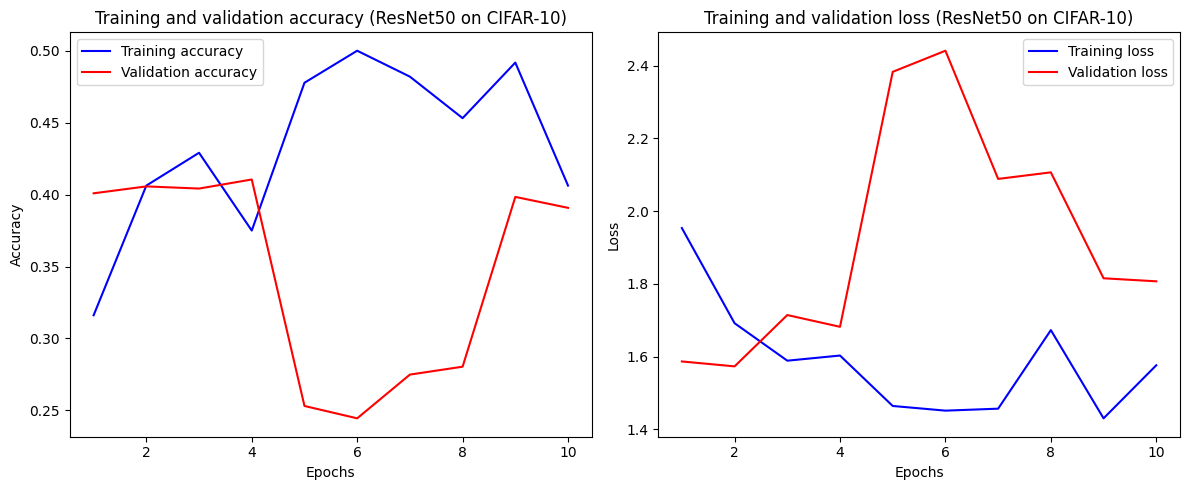

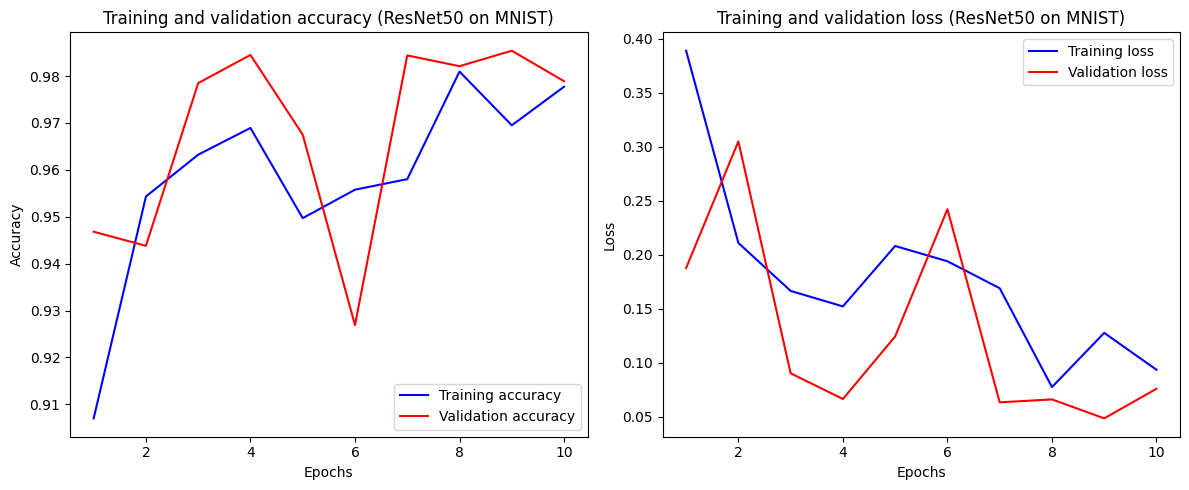

In [34]:
# Plot training history for VGG-16 model
def plot_training_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title(f'Training and validation accuracy ({title})')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(f'Training and validation loss ({title})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history_cifar10_resnet50, 'ResNet50 on CIFAR-10')
plot_training_history(history_mnist_resnet50, 'ResNet50 on MNIST')

In [37]:
# Evaluate the ResNet50 model on CIFAR-10 test data
y_pred_cifar10_resnet50 = np.argmax(resnet50_cifar10.predict(x_test_cifar10), axis=-1)
y_true_cifar10_resnet50 = np.argmax(y_test_cifar10, axis=-1)
accuracy_cifar10_resnet50 = accuracy_score(y_true_cifar10_resnet50, y_pred_cifar10_resnet50)
precision_cifar10_resnet50 = precision_score(y_true_cifar10_resnet50, y_pred_cifar10_resnet50, average='weighted')

print("\nResNet50 Model Evaluation on CIFAR-10:")
print(f"Accuracy: {accuracy_cifar10_resnet50:.10f}")
print(f"Precision: {precision_cifar10_resnet50:.10f}")
print(classification_report(y_true_cifar10_resnet50, y_pred_cifar10_resnet50, target_names=class_names_cifar10))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

ResNet50 Model Evaluation on CIFAR-10:
Accuracy: 0.3908000000
Precision: 0.4610951396
              precision    recall  f1-score   support

    airplane       0.55      0.49      0.52      1000
  automobile       0.52      0.70      0.59      1000
        bird       0.32      0.23      0.26      1000
         cat       0.27      0.10      0.14      1000
        deer       0.30      0.27      0.28      1000
         dog       0.37      0.20      0.26      1000
        frog       0.24      0.92      0.39      1000
       horse       0.73      0.23      0.35      1000
        ship       0.68      0.50      0.58      1000
       truck       0.64      0.29      0.40      1000

    accuracy                           0.39     10000
   macro avg       0.46      0.39      0.38     10000
weighted avg       0.46      0.39      0.38     10000



In [40]:
# Evaluate the ResNet50 model on resized MNIST test data
y_true_mnist_resnet50 = np.argmax(y_test_mnist, axis=-1)
accuracy_mnist_resnet50 = accuracy_score(y_true_mnist_resnet50, y_pred_mnist_resnet50)
precision_mnist_resnet50 = precision_score(y_true_mnist_resnet50, y_pred_mnist_resnet50, average='weighted')

print("\nResNet50 Model Evaluation on MNIST:")
print(f"Accuracy: {accuracy_mnist_resnet50:.10f}")
print(f"Precision: {precision_mnist_resnet50:.10f}")
print(classification_report(y_true_mnist_resnet50, y_pred_mnist_resnet50, target_names=class_names_mnist))


ResNet50 Model Evaluation on MNIST:
Accuracy: 0.9789000000
Precision: 0.9792632805
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.95      1.00      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.96      0.98       892
           6       1.00      0.93      0.97       958
           7       0.97      1.00      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

